# Simple MNIST Example
### Import packages

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchinfo import summary
from model import SimpleCNN

### Load and visualize MNIST Dataset

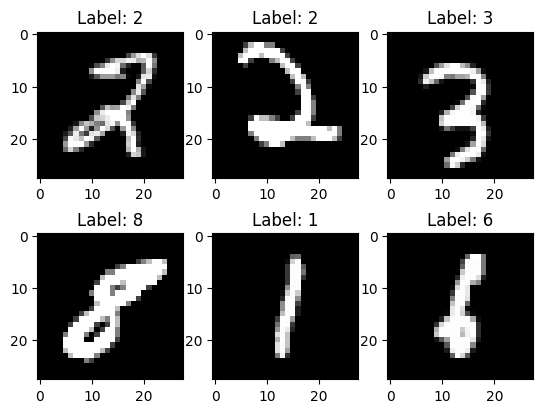

In [48]:
# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for batching
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some samples
examples = iter(train_loader)
images, labels = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i]}")
plt.show()


### Setup training

In [49]:
# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set seed for reproducibility
torch.manual_seed(42)

# Print model summary using torchinfo
summary(model)

Layer (type:depth-idx)                   Param #
SimpleCNN                                --
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─Linear: 1-3                            16,010
├─Softmax: 1-4                           --
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0

### Training

In [50]:
# Training loop
def train(model, loader, optimizer, loss_fn, device):
    model.train()
    for epoch in range(5):  # Number of epochs
        running_loss = 0.0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(loader)}")

train(model, train_loader, optimizer, loss_fn, device)


Epoch 1, Loss: 0.2128838551635824
Epoch 2, Loss: 0.08174584294408202
Epoch 3, Loss: 0.06645039621808095
Epoch 4, Loss: 0.05722958703690679
Epoch 5, Loss: 0.05250983120076039


### Evaluate the model

In [51]:
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

evaluate(model, test_loader, device)

Accuracy: 98.97%
